In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import io
import numpy as np
from PIL import Image

from bootstrap import get_captcha, check_captcha, login
from predict import prediction
from preprocess_v3 import gen_images

学号：1800011607
密码：········


In [2]:
login()

login


In [17]:
def step():
    rawim = get_captcha()
    im = Image.open(io.BytesIO(rawim))
    
    show_images = gen_images(im, False).squeeze()
    ans = prediction(gen_images(im))
    succ = check_captcha(ans)

    print('Pred: %s'%(ans), 'Correct!' if succ else 'Failed!')

    im.seek(15)
    plt.figure(12)
    plt.subplot(2, 1, 1)
    img4 = Image.new("RGB", im.size)
    img4.paste(im)
    img4 = np.array(im)
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.imshow(im)

    for i in range(4):
        plt.subplot(2, 4, 5 + i)
        plt.xticks([])
        plt.yticks([])
        plt.axis('off')
        plt.imshow(show_images[i], cmap='gray')
        plt.title(ans[i], y=-0.3)

Pred: REWB Correct!


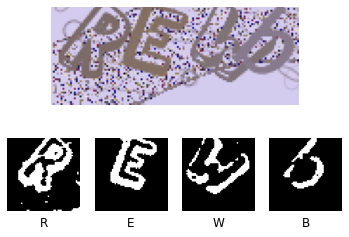

In [29]:
step()